## Logistic Regression model on Credit Risk Analysis Use Case

### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Section 1 : Setting the working directory

In [2]:
os.getcwd()

'C:\\Users\\rahul'

In [3]:
os.chdir('C:\\Users\\rahul\\OneDrive\\BIZOP\\AFI Tech Bangalore\\TAKEOVERS\\Afitech PPML Datasets\\LOGISTIC REGRESSION CREDIT RISK USE CASE')
os.getcwd()

'C:\\Users\\rahul\\OneDrive\\BIZOP\\AFI Tech Bangalore\\TAKEOVERS\\Afitech PPML Datasets\\LOGISTIC REGRESSION CREDIT RISK USE CASE'

### Section 2 : Reading Data in Python Memory

In [4]:
# Create link variables to refer to file location on your PC
trainfile = 'C1_Train_Data.csv'
testfile = 'C1_Test_Data.csv'
validfile = 'C1_Validate_Data.csv'

In [5]:
#Copy data from the files to the dataframes created in Python for use in this program
traindf = pd.read_csv(trainfile)
testdf = pd.read_csv(testfile)
validdf = pd.read_csv(validfile)

### Section 3 : Checking the structure of the data

In [6]:
traindf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
testdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [8]:
validdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,N
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural,Y


In [9]:
print(traindf.shape)
print(testdf.shape)
print(validdf.shape)

(614, 13)
(367, 12)
(367, 13)


In [10]:
print(traindf.info())
print(testdf.info())
print(validdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            3

In [11]:
# Change the column name 'Outcome' in validation data to 'Loan_Status'. This is done for uniform nomenclature.
validdf.rename(columns = {"outcome" : "Loan_Status"}, inplace=True)

In [12]:
#traindf.isnull()

In [13]:
traindf.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
print(traindf.columns)
print(traindf.isnull().sum())
print(testdf.columns)
print(testdf.isnull().sum())
print(validdf.columns)
print(validdf.isnull().sum())

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount

### Section 4 : Imputation of Missing Values

Part A : Joining of Datasets :
Since the datasets available with us are already splitted into training, test and validation data, we have two options to do pre-processing of data with them. First option is to do data munging and cleansing on all three datasets separately, while another option is to concatenate the three datasets into one while doing data preparations, and then re-split again before the modeling stage. We are here considering the second option to make it easy for demo and practice, while results could be little different then the data pre-processing done individually. 

In [15]:
# Set 1 : traindf : 614 rows : row 0 to row 613
# Set 2 : testdf : 367 rows : row 0 to row 366
# Set 3 : validdf : 367 rows : row 0 to row 366
# sumsetdf : traindf + testdf + validdf : 1348 rows : row 0 to row 1347
#                           : row 0 to row 613 from traindf
#                           : row 614 to row 980 from testdf
#                           : row 981 to row 1347 from validdf
sumsetdf = pd.concat([traindf, testdf, validdf], axis=0, sort = False)

In [16]:
print(sumsetdf.info())
print(sumsetdf.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              1348 non-null object
Gender               1313 non-null object
Married              1345 non-null object
Dependents           1313 non-null object
Education            1348 non-null object
Self_Employed        1270 non-null object
ApplicantIncome      1348 non-null int64
CoapplicantIncome    1348 non-null float64
LoanAmount           1316 non-null float64
Loan_Amount_Term     1322 non-null float64
Credit_History       1240 non-null float64
Property_Area        1348 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 147.4+ KB
None
(1348, 13)


In [17]:
sumsetdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
sumsetdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [19]:
#Resetting the index, to assure the 
sumsetdf.reset_index(inplace=True, drop=True)

In [20]:
# Checking the index correction
sumsetdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1343,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
1344,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
1345,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
1346,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
1347,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [21]:
sumsetdf.isnull().sum()

Loan_ID                0
Gender                35
Married                3
Dependents            35
Education              0
Self_Employed         78
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            32
Loan_Amount_Term      26
Credit_History       108
Property_Area          0
Loan_Status          367
dtype: int64

Part B : Filling of Missing Values of each column one by one. We are not doing this processing for the column "Loan_Status", considering it as dependent variable for modelling. The missing values observed are as below:

In [22]:
print(sumsetdf['Credit_History'].value_counts(dropna=False))
print(sumsetdf['Dependents'].value_counts(dropna=False))
print(sumsetdf['Gender'].value_counts(dropna=False))
print(sumsetdf['LoanAmount'].value_counts(dropna=False))
print(sumsetdf['Loan_Amount_Term'].value_counts(dropna=False))
print(sumsetdf['Married'].value_counts(dropna=False))
print(sumsetdf['Self_Employed'].value_counts(dropna=False))

1.0    1033
0.0     207
NaN     108
Name: Credit_History, dtype: int64
0      745
2      219
1      218
3+     131
NaN     35
Name: Dependents, dtype: int64
Male      1061
Female     252
NaN         35
Name: Gender, dtype: int64
120.0    38
110.0    37
100.0    33
NaN      32
150.0    31
         ..
405.0     1
265.0     1
42.0      1
279.0     1
73.0      1
Name: LoanAmount, Length: 233, dtype: int64
360.0    1134
180.0      88
480.0      31
300.0      27
NaN        26
240.0      12
84.0       10
120.0       5
36.0        4
60.0        4
12.0        3
350.0       2
6.0         2
Name: Loan_Amount_Term, dtype: int64
Yes    864
No     481
NaN      3
Name: Married, dtype: int64
No     1114
Yes     156
NaN      78
Name: Self_Employed, dtype: int64


Part C1 : Credit_History

In [23]:
sumsetdf['Credit_History'].value_counts(dropna=False)

1.0    1033
0.0     207
NaN     108
Name: Credit_History, dtype: int64

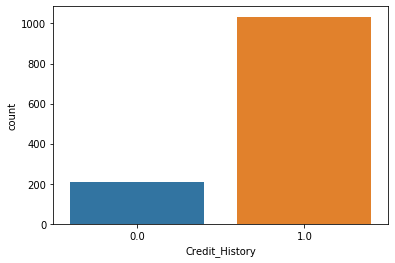

In [24]:
sb.countplot(x="Credit_History", data=sumsetdf)
plt.show()

In [25]:
#sumsetdf[sumsetdf["Credit_History"].isnull()].index.tolist()

In [26]:
Credit_History_Null = sumsetdf[sumsetdf["Credit_History"].isnull()].index.tolist()
print(Credit_History_Null)

[16, 24, 30, 42, 79, 83, 86, 95, 117, 125, 129, 130, 156, 181, 187, 198, 219, 236, 237, 259, 260, 279, 309, 313, 317, 318, 323, 348, 363, 377, 392, 395, 411, 444, 449, 451, 460, 473, 490, 491, 497, 503, 506, 530, 533, 544, 556, 565, 583, 600, 617, 626, 640, 642, 659, 704, 713, 718, 729, 753, 757, 778, 791, 793, 799, 816, 834, 873, 876, 879, 896, 900, 919, 943, 950, 965, 972, 974, 978, 984, 993, 1007, 1009, 1026, 1071, 1080, 1085, 1096, 1120, 1124, 1145, 1158, 1160, 1166, 1183, 1201, 1240, 1243, 1246, 1263, 1267, 1286, 1310, 1317, 1332, 1339, 1341, 1345]


In [27]:
#sumsetdf.iloc[[1,2],[3,4]]

In [28]:
sumsetdf['Credit_History'].iloc[Credit_History_Null]  = 1

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
Credit_History_Null = sumsetdf[sumsetdf["Credit_History"].isnull()].index.tolist()
print(Credit_History_Null)

[]


Part C2 : Dependents

In [30]:
sumsetdf['Dependents'].value_counts(dropna=False)

0      745
2      219
1      218
3+     131
NaN     35
Name: Dependents, dtype: int64

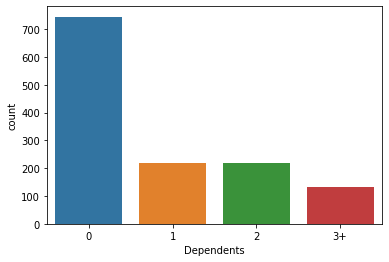

In [31]:
sb.countplot(x="Dependents", data=sumsetdf)
plt.show()

In [32]:
Dependents_Null = sumsetdf[sumsetdf["Dependents"].isnull()].index.tolist()
print(Dependents_Null)

[102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517, 571, 597, 660, 684, 725, 752, 816, 861, 865, 879, 916, 926, 1027, 1051, 1092, 1119, 1183, 1228, 1232, 1246, 1283, 1293]


In [33]:
sumsetdf['Dependents'].iloc[Dependents_Null] = "0"

In [34]:
Dependents_Null = sumsetdf[sumsetdf["Dependents"].isnull()].index.tolist()
print(Dependents_Null)

[]


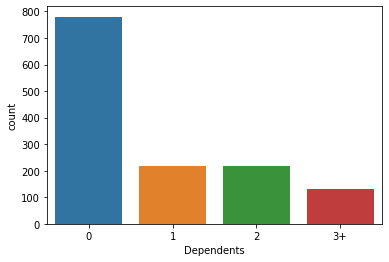

In [35]:
sb.countplot(x="Dependents", data=sumsetdf)
plt.show()

Part C3 : Gender

In [36]:
sumsetdf['Gender'].value_counts(dropna=False)

Male      1061
Female     252
NaN         35
Name: Gender, dtype: int64

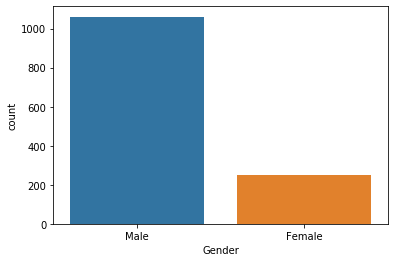

In [37]:
sb.countplot(x="Gender", data=sumsetdf)
plt.show()

In [38]:
Gender_Null = sumsetdf[sumsetdf["Gender"].isnull()].index.tolist()
print(Gender_Null)

[23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592, 636, 665, 720, 752, 823, 845, 859, 893, 910, 917, 932, 1003, 1032, 1087, 1119, 1190, 1212, 1226, 1260, 1277, 1284, 1299]


In [39]:
sumsetdf['Gender'].iloc[Gender_Null] = "Male"

In [40]:
Gender_Null = sumsetdf[sumsetdf["Gender"].isnull()].index.tolist()
print(Gender_Null)

[]


Part C4 : LoanAmount

In [41]:
sumsetdf['LoanAmount'].value_counts(dropna=False)

120.0    38
110.0    37
100.0    33
NaN      32
150.0    31
         ..
405.0     1
265.0     1
42.0      1
279.0     1
73.0      1
Name: LoanAmount, Length: 233, dtype: int64

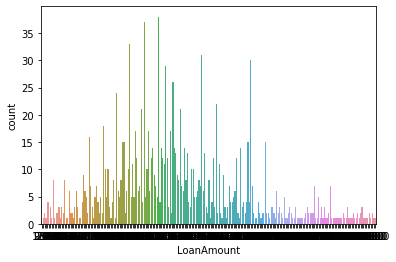

In [42]:
sb.countplot(x="LoanAmount", data=sumsetdf)
plt.show()

In [43]:
LoanAmount_Null = sumsetdf[sumsetdf["LoanAmount"].isnull()].index.tolist()
print(LoanAmount_Null)

[0, 35, 63, 81, 95, 102, 103, 113, 127, 202, 284, 305, 322, 338, 387, 435, 437, 479, 524, 550, 551, 605, 692, 715, 802, 861, 903, 1059, 1082, 1169, 1228, 1270]


In [44]:
#sumsetdf["LoanAmount"].median()

In [45]:
LoanAmountMedian = sumsetdf["LoanAmount"].median()
print(LoanAmountMedian)

126.0


In [46]:
sumsetdf['LoanAmount'].iloc[LoanAmount_Null] = LoanAmountMedian

In [47]:
LoanAmount_Null = sumsetdf[sumsetdf["LoanAmount"].isnull()].index.tolist()
print(LoanAmount_Null)

[]


Part C5 : Loan_Amount_Term

In [48]:
sumsetdf['Loan_Amount_Term'].value_counts(dropna=False)

360.0    1134
180.0      88
480.0      31
300.0      27
NaN        26
240.0      12
84.0       10
120.0       5
36.0        4
60.0        4
12.0        3
350.0       2
6.0         2
Name: Loan_Amount_Term, dtype: int64

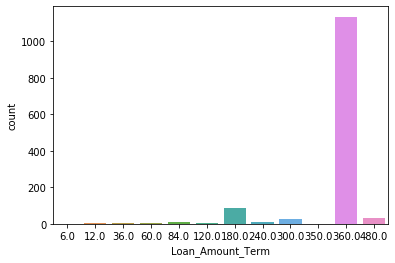

In [49]:
sb.countplot(x="Loan_Amount_Term", data=sumsetdf)
plt.show()

In [50]:
Loan_Amount_Term_Null = sumsetdf[sumsetdf["Loan_Amount_Term"].isnull()].index.tolist()
print(Loan_Amount_Term_Null)

[19, 36, 44, 45, 73, 112, 165, 197, 223, 232, 335, 367, 421, 423, 659, 662, 731, 743, 798, 828, 1026, 1029, 1098, 1110, 1165, 1195]


In [51]:

sumsetdf['Loan_Amount_Term'].iloc[Loan_Amount_Term_Null] = 360

In [52]:
Loan_Amount_Term_Null = sumsetdf[sumsetdf["Loan_Amount_Term"].isnull()].index.tolist()
print(Loan_Amount_Term_Null)

[]


Part C6 : Married

In [53]:
sumsetdf['Married'].value_counts(dropna=False)

Yes    864
No     481
NaN      3
Name: Married, dtype: int64

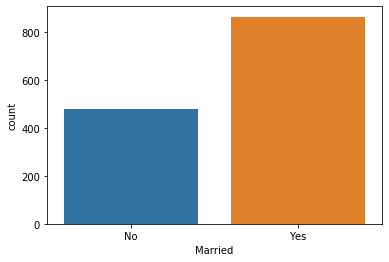

In [54]:
sb.countplot(x="Married", data=sumsetdf)
plt.show()

In [55]:
Married_Null = sumsetdf[sumsetdf["Married"].isnull()].index.tolist()
print(Married_Null)

[104, 228, 435]


In [56]:
sumsetdf['Married'].iloc[Married_Null] = "Yes"

In [57]:
Married_Null = sumsetdf[sumsetdf["Married"].isnull()].index.tolist()
print(Married_Null)

[]


Part C7 : Self_Employed

In [58]:
sumsetdf['Self_Employed'].value_counts(dropna=False)

No     1114
Yes     156
NaN      78
Name: Self_Employed, dtype: int64

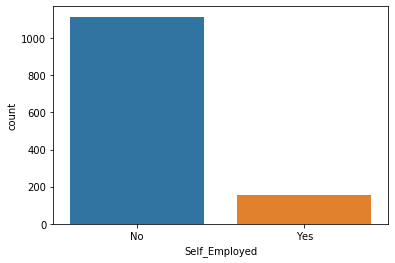

In [59]:
sb.countplot(x="Self_Employed", data=sumsetdf)
plt.show()

In [60]:
Self_Employed_Null = sumsetdf[sumsetdf["Self_Employed"].isnull()].index.tolist()
print(Self_Employed_Null)

[11, 19, 24, 29, 30, 95, 107, 111, 114, 158, 170, 218, 231, 236, 268, 295, 333, 336, 344, 374, 380, 385, 411, 432, 447, 463, 468, 535, 542, 579, 600, 601, 622, 625, 627, 650, 686, 703, 756, 775, 782, 789, 806, 857, 869, 873, 890, 892, 899, 901, 908, 911, 915, 937, 940, 989, 992, 994, 1017, 1053, 1070, 1123, 1142, 1149, 1156, 1173, 1224, 1236, 1240, 1257, 1259, 1266, 1268, 1275, 1278, 1282, 1304, 1307]


In [61]:
sumsetdf['Self_Employed'].iloc[Self_Employed_Null] = "No"

In [62]:
Self_Employed_Null = sumsetdf[sumsetdf["Self_Employed"].isnull()].index.tolist()
print(Self_Employed_Null)

[]


Part D : Cross check the table with missing values filled with suitable values.

In [63]:
sumsetdf.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

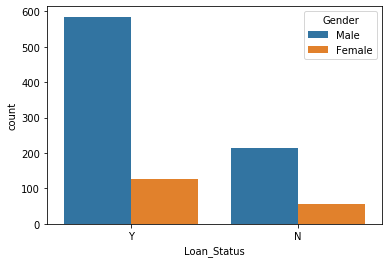

In [65]:
sb.countplot(x='Loan_Status',hue='Gender' ,data=sumsetdf)

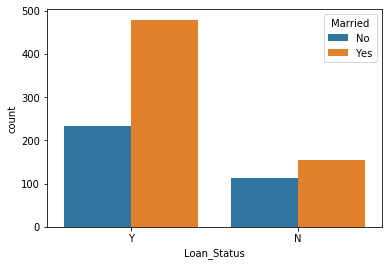

In [66]:
sb.countplot(x='Loan_Status',hue='Married' ,data=sumsetdf)

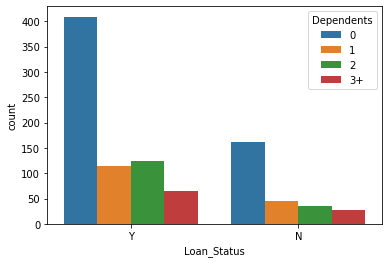

In [67]:
sb.countplot(x='Loan_Status',hue='Dependents' ,data=sumsetdf)

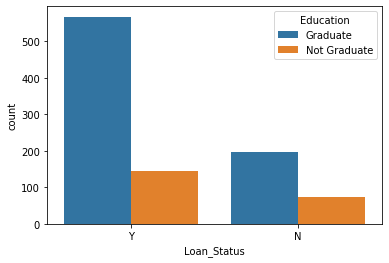

In [68]:
sb.countplot(x='Loan_Status',hue='Education' ,data=sumsetdf)

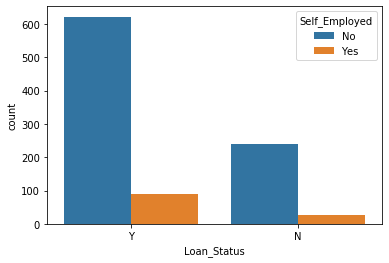

In [69]:
sb.countplot(x='Loan_Status',hue='Self_Employed' ,data=sumsetdf)

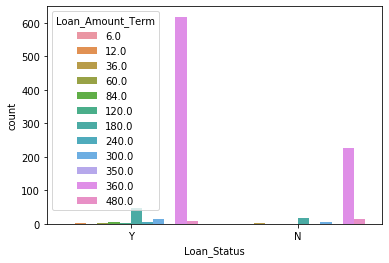

In [75]:
sb.countplot(x='Loan_Status' ,hue='Loan_Amount_Term',data=sumsetdf)

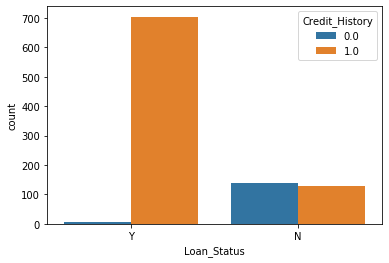

In [72]:
sb.countplot(x='Loan_Status',hue='Credit_History' ,data=sumsetdf)

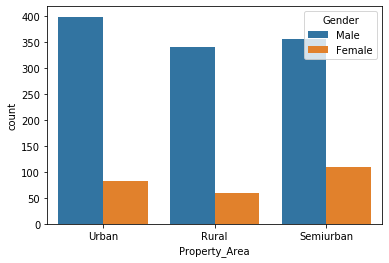

In [73]:
sb.countplot(x='Property_Area',hue='Gender' ,data=sumsetdf)

### Section 5 : Create Dummies in Dataframe

In [76]:
sumsetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 13 columns):
Loan_ID              1348 non-null object
Gender               1348 non-null object
Married              1348 non-null object
Dependents           1348 non-null object
Education            1348 non-null object
Self_Employed        1348 non-null object
ApplicantIncome      1348 non-null int64
CoapplicantIncome    1348 non-null float64
LoanAmount           1348 non-null float64
Loan_Amount_Term     1348 non-null float64
Credit_History       1348 non-null float64
Property_Area        1348 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 137.0+ KB


In [77]:
sdf = sumsetdf.drop(['Loan_ID'],axis=1)
sdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
1344,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
1345,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,Y
1346,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [78]:
sumsetdfdum = pd.get_dummies(sdf,drop_first=True)

In [79]:
sumsetdfdum

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,1
1344,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
1345,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,1
1346,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,0


In [80]:
sumsetdfdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 15 columns):
ApplicantIncome            1348 non-null int64
CoapplicantIncome          1348 non-null float64
LoanAmount                 1348 non-null float64
Loan_Amount_Term           1348 non-null float64
Credit_History             1348 non-null float64
Gender_Male                1348 non-null uint8
Married_Yes                1348 non-null uint8
Dependents_1               1348 non-null uint8
Dependents_2               1348 non-null uint8
Dependents_3+              1348 non-null uint8
Education_Not Graduate     1348 non-null uint8
Self_Employed_Yes          1348 non-null uint8
Property_Area_Semiurban    1348 non-null uint8
Property_Area_Urban        1348 non-null uint8
Loan_Status_Y              1348 non-null uint8
dtypes: float64(4), int64(1), uint8(10)
memory usage: 65.9 KB


In [81]:
traindata = sumsetdfdum[0:614]
testdata = sumsetdfdum[614:981]
validdata = sumsetdfdum[981:]

In [82]:
traindata.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
613,4583,0.0,133.0,360.0,0.0,0,0,0,0,0,0,1,1,0,0


In [83]:
testdata.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
976,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,0
977,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
978,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,0
979,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,0
980,9200,0.0,98.0,180.0,1.0,1,0,0,0,0,0,1,0,0,0


In [84]:
validdata.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
981,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
982,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
983,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
984,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
985,3276,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,0


In [ ]:
##Ytest.head()

In [85]:
# Defining independent and dependent variables

Xtrain = traindata.drop(['Loan_Status_Y'], axis=1)
Ytrain = traindata['Loan_Status_Y']

Xtest = validdata.drop(['Loan_Status_Y'], axis=1)
Ytest = validdata['Loan_Status_Y']

In [86]:
# Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression as LR1

In [87]:
# Creating empty and untrained model
log_reg = LR1()

In [88]:
# Training the model with Logistic Regression algorithm
log_reg.fit(Xtrain, Ytrain)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_predict = log_reg.predict(Xtest)

In [90]:
print(y_predict)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [91]:
print(Ytest)

981     1
982     1
983     1
984     1
985     0
       ..
1343    1
1344    1
1345    1
1346    0
1347    1
Name: Loan_Status_Y, Length: 367, dtype: uint8


In [94]:
if len(Ytest) == len(y_predict) : print("Length compatible")
count = 0
l1 = list(Ytest)
l2 = list(y_predict)

for m in range(len(l1)):
    if l1[m] == l2[m] :
        count += 1
        
print('matches = ',count)
print('accuracy = ',count*100/len(l1))
    
    

Length compatible
matches =  345
accuracy =  94.00544959128065


In [95]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(confusion_matrix(Ytest, y_predict))

[[ 56  21]
 [  1 289]]


In [98]:
print(classification_report(Ytest, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84        77
           1       0.93      1.00      0.96       290

    accuracy                           0.94       367
   macro avg       0.96      0.86      0.90       367
weighted avg       0.94      0.94      0.94       367



In [ ]:
#FinalTest = testdata.drop(['Loan_Status_Y'], axis=1)
#results = log_reg.predict(FinalTest)

In [ ]:
#print(results)